Phyphox Spring Lab
(**Phy**sics **Pho**ne E**x**periments)

In this activity, your group will:

1)  Use the "Phyphox" app from your phone to collect data.

2)  Upload your properly formatted data to your google drive.

3)  Import the data file into the Python code.

4)  Construct a graph of your phone's acceleration vs. time.

5)  Filter the data, such that your code considers only when your phone was oscillating to be used.

6)  Fit your graph to a best fit sinusoidal curve

7)  Verify the period of oscillation by data analysis using Python.

8)  Given the spring constant of your spring, determine the mass of your phone.

---



First, you need to import command libraries to make your code functional.  Next to line 1, click the play button.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from numpy.random import default_rng
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

You need the data file to be in your google drive.
It must be formatted as a ".csv" file
Below, I have a data called "SpringData," and it is located in the "Colab Notebooks" folder in "MyDrive"

In [ ]:
# This allows your code to access your google drive.
from google.colab import drive
# This allows your code to access the correct data file.  The url must match.
springdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SpringData.csv')
# This allows you to look at the first three rows of data
springdata.head(3)

# You may need to sign into your google Drive, if you are not prompted to do so, try it again

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,1.93,0.384,1.550,0.792
1,1.95,0.632,1.080,0.666
2,1.97,0.576,0.465,0.399


Most of the acceleration is in the y-direction, but we should consider the absolute (total) acceleration.

In [ ]:
springdata['AbsAccel'] = (springdata['Acceleration x (m/s^2)']**2 + springdata['Acceleration y (m/s^2)']**2 + springdata['Acceleration z (m/s^2)']**2)**.5
springdata.head(3)

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),AbsAccel
0,1.93,0.384,1.550,0.792,1.782476
1,1.95,0.632,1.080,0.666,1.417526
2,1.97,0.576,0.465,0.399,0.840953


Next, plot a graph of acceleration versus time.

Text(0.5, 1.0, 'Acceleration of an Oscillating Spring')

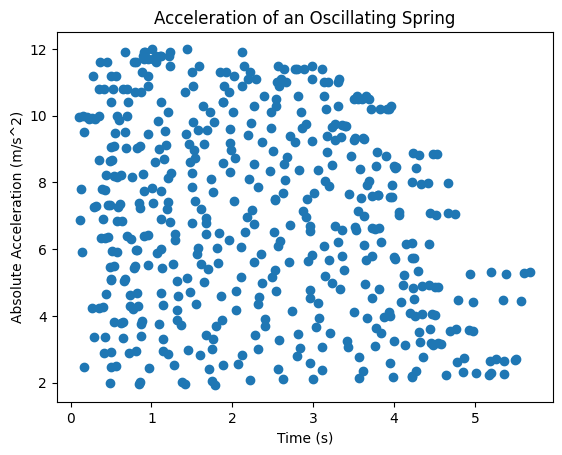

In [ ]:
plt.scatter(springdata['AbsAccel'], springdata['Time (s)'])
plt.xlabel('Time (s)')
plt.ylabel('Absolute Acceleration (m/s^2)')
plt.title('Acceleration of an Oscillating Spring')

This plot has some issues.  First, PhyPhox was collecting data before the spring began oscillating, so the first several data points are known to not follow a periodic function.  Second, the oscillations are bunched together in time, so we see a scatter instead of an immediately recognizable pattern - a wave.  Thus, we only need to see a few oscillations to see a periodic function on a graph.

This part of the code filters the data so that we eliminate the first 1/3 and the last 1/3 of the data, and keep only the middle 1/3.

In [ ]:
total_rows = len(springdata)
print ("Total Rows of Data:", total_rows)

start_index = total_rows // 3
end_index = 2 * (total_rows // 3)

middle_third_data = springdata.iloc[start_index:end_index]
middle_third_data.head(3)


Total Rows of Data: 500


,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),AbsAccel
166,5.28,0.111,5.48,1.19,5.608816
167,5.30,0.546,5.52,1.25,5.686037
168,5.32,0.694,5.02,1.17,5.201051


Plot only the middle third of the data

Scale Start: 5.28
Scale End: 8.62


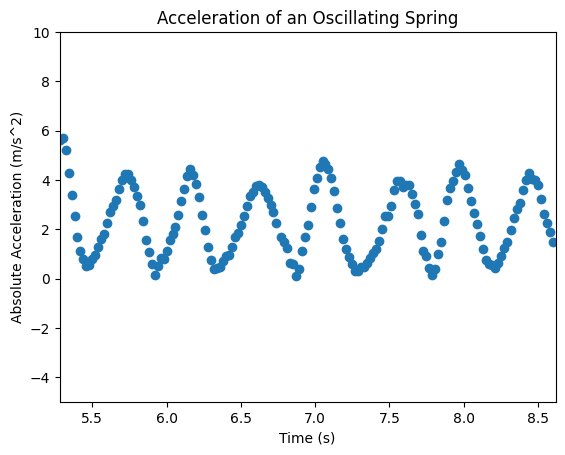

In [ ]:
plt.scatter(middle_third_data['Time (s)'], middle_third_data['AbsAccel'])
plt.xlabel('Time (s)')
plt.ylabel('Absolute Acceleration (m/s^2)')
plt.title('Acceleration of an Oscillating Spring')

scale_start = springdata.loc[start_index, 'Time (s)']
scale_end = springdata.loc[end_index, 'Time (s)']

print ("Scale Start:", scale_start)
print ("Scale End:", scale_end)

plt.axis([scale_start, scale_end, -5,10])
plt.show()

Nice! You have a sinusoidal graph (a periodic function)!

The general equation for a periodic function is:

y = A * sin (2 * pi * f - phi) + c

where:

A = amplitude

f = frequency

phi = the phase shift

and

c = the y-intercept

Next, fit the graph to a best-fit sine (or cosine) graph.

From middle_third_data, we'll use 'Time (s)' for x and 'AbsAccel' for y

Fitted Parameters: A = -0.3625640918334699 f = 1.1714124333218916 phi = -8.277001173172662 c = 2.3514056452775263
Period of the Sinusoidal Function: 0.4742857142857042 seconds


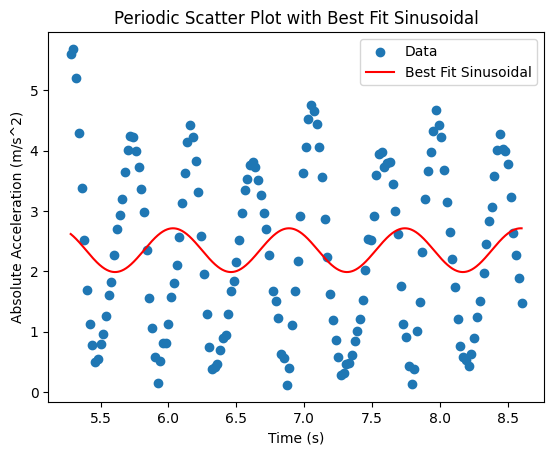

In [ ]:
# Define the sine wave

def sin_function(t, A, f, phi, c):
    return A * np.sin(2 * np.pi * f * t + phi) + c

# Fit the sinusoidal function to the data using curve_fit

p0 = (1, 1, 0, 0)  # Initial guess for the parameters (Amplitude, Frequency, Phase, Offset)
params, _ = curve_fit(sin_function, middle_third_data['Time (s)'], middle_third_data['AbsAccel'], p0=p0)

# Extract the fitted parameters
A_fit, f_fit, phi_fit, c_fit = params

# Create a time array for plotting the sinusoidal function
t_plot = np.linspace(middle_third_data['Time (s)'].min(), middle_third_data['Time (s)'].max(), 1000)

# Calculate the fitted sinusoidal function values
fit_values = sin_function(t_plot, A_fit, f_fit, phi_fit, c_fit)

# Plot the original data and the best fit sinusoidal function
plt.scatter(middle_third_data['Time (s)'], middle_third_data['AbsAccel'], label='Data')
plt.plot(t_plot, fit_values, color='red', label='Best Fit Sinusoidal')
plt.xlabel('Time (s)')
plt.ylabel('Absolute Acceleration (m/s^2)')
plt.title('Periodic Scatter Plot with Best Fit Sinusoidal')
plt.legend()

# Determine the period of the sinusoidal function using Fourier Transform
fft_vals = np.fft.fft(middle_third_data['AbsAccel'])
freqs = np.fft.fftfreq(len(middle_third_data['Time (s)']), middle_third_data['Time (s)'].iloc[1] - middle_third_data['Time (s)'].iloc[0])
amplitude_spectrum = np.abs(fft_vals)
period = 1 / np.abs(freqs[np.argmax(amplitude_spectrum[1:]) + 1])

print("Fitted Parameters: A =", A_fit, "f =", f_fit, "phi =", phi_fit, "c =", c_fit)
print("Period of the Sinusoidal Function:", period, "seconds")

# Display the plot
plt.show()

Finally, determine the mass of your phone.  You will need the spring constant of your spring.

Since the period of a spring-mass system is:

T = 2 * pi * sqrt (m / k)

where:

T = the period

m = the mass on the spring

and

k = the spring constant, a quick calculation will allow us to determine the mass of your phone.

In [ ]:
# Function to calculate mass given k and period
def calc_mass(k, period):
    mass = (period / (2 * np.pi)) ** 2 * k
    return mass

# Get user input for 'k'
k_input = float(input("Enter the value of spring constant 'k': "))

# Calculate mass using the input values
mass_result = calc_mass(k_input, period)

# Get user input for actual mass of phone and calculate percent error
m_input = float(input("Enter the actual mass of your phone 'm(actual) in kilograms:"))

# Function to calculate percent error given actual mass and experimental mass (from graph analysis)
#def calc_error(mass_result, m_input):
calc_error = (np.abs(mass_result - m_input) / (m_input)) * 100
#print(calc_error)

#error_result = calc_error(mass_result, m_input)
#print(error_result)

# Display the result
print("The calculated mass is:", mass_result, "kg")
print("The percent error is:", calc_error, "%")

Enter the value of spring constant 'k': 75
Enter the actual mass of your phone 'm(actual) in kilograms:.420
The calculated mass is: 0.4273479392522665 kg
The percent error is: 1.7495093457777409 %


Written by Marc Baron, Sun Valley High School, Aston, PA; University of Pennsylvania QuarkNet Center

Please share comments: mbaron@pdsd.org
